# Ejercicios de Visualización de Datos

#### Importacion necesaria:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import pandas as pd
import seaborn as sns

### 1. Escribir un programa que pregunte al usuario por las ventas de un rango de años y muestre por pantalla un diagrama de líneas con la evolución de las ventas.


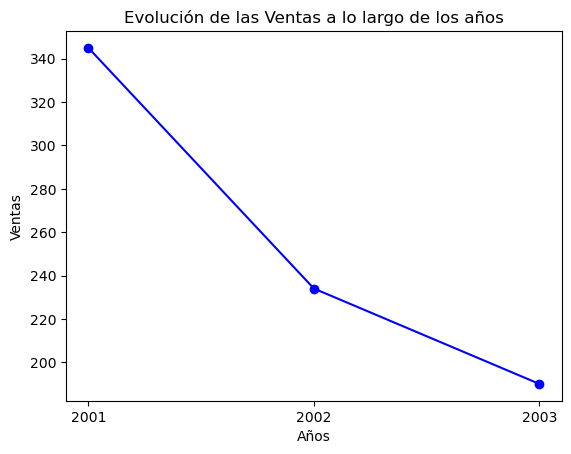

In [2]:
#rango de años
inicio = int(input("Ingresa el año de inicio"))
fin = int(input("Ingresa el año de fin"))

anios = []
ventas = []

#funcion que recoge las ventas por cada año dependiendo del rango que nos de el susuario
for anio in range(inicio, fin+1):
    ventas_anio = float(input(f"Ingresa las ventas para el año {anio}: "))
    anios.append(anio)
    ventas.append(ventas_anio)

#grafico
plt.plot(anios, ventas, marker='o', linestyle='-', color='b')

plt.xlabel("Años")
plt.ylabel("Ventas")
plt.title("Evolución de las Ventas a lo largo de los años")

#para que muestren solo en x los datos que introducimos en el limite como años
plt.xticks(anios)
plt.show()



### 2. Escribir una función que reciba un diccionario con las notas de las asignaturas de un curso y una cadena con el nombre de un color y devuelva un diagrama de barras de las notas en el color dado.


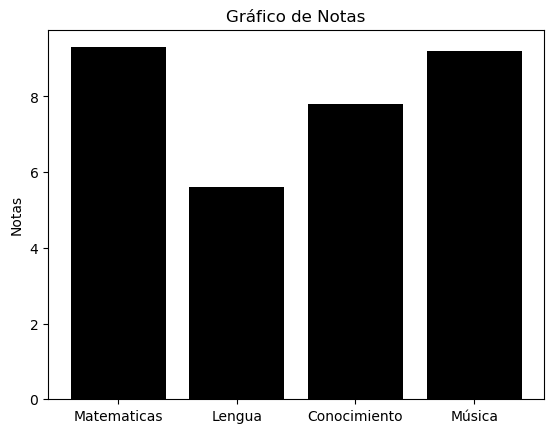

In [ ]:
#rango de años
notas = {"Matematicas":9.3,
         "Lengua":5.6,
         "Conocimiento":7.8,
         "Música":9.2}
colorbarra= str(input("Ingresa el color de las barras para el diagrama, colores en ingles"))

#grafico
plt.bar(notas.keys(), notas.values(), color=colorbarra)

plt.ylabel("Notas")
plt.title("Notas del alumno")

plt.show()

### 3. Escribir una función que reciba una serie de Pandas con las notas de los alumnos de un curso y devuelva un diagrama de cajas con las notas. El diagrama debe tener el título “Distribución de notas”.


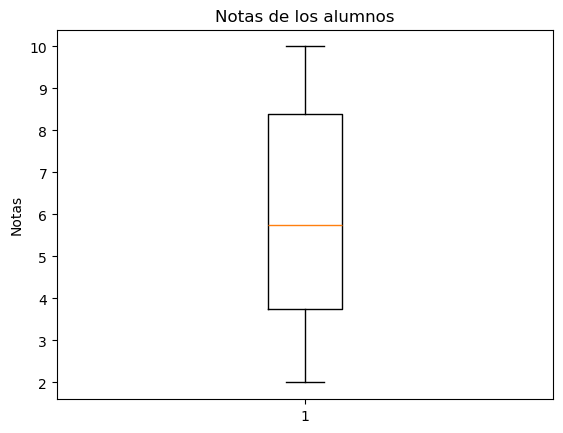

In [12]:
notas = pd.Series([2, 3, 4.5, 4, 8, 7, 10, 9.6])
plt.boxplot(notas)

plt.title('Notas de los alumnos')
plt.ylabel('Notas')

plt.show()

### 4. El fichero `bancos.csv` contiene las cotizaciones de los principales bancos de España con:
- Empresa (nombre de la empresa)
- Apertura (precio de la acción a la apertura de bolsa)
- Máximo (precio máximo de la acción durante la jornada)
- Mínimo (precio mínimo de la acción durante la jornada)
- Cierre (precio de la acción al cierre de bolsa)
- Volumen (volumen al cierre de bolsa)

Construir una función reciba el fichero `bancos.csv` y cree un diagrama de líneas con las series temporales de las cotizaciones de cierre de cada banco.


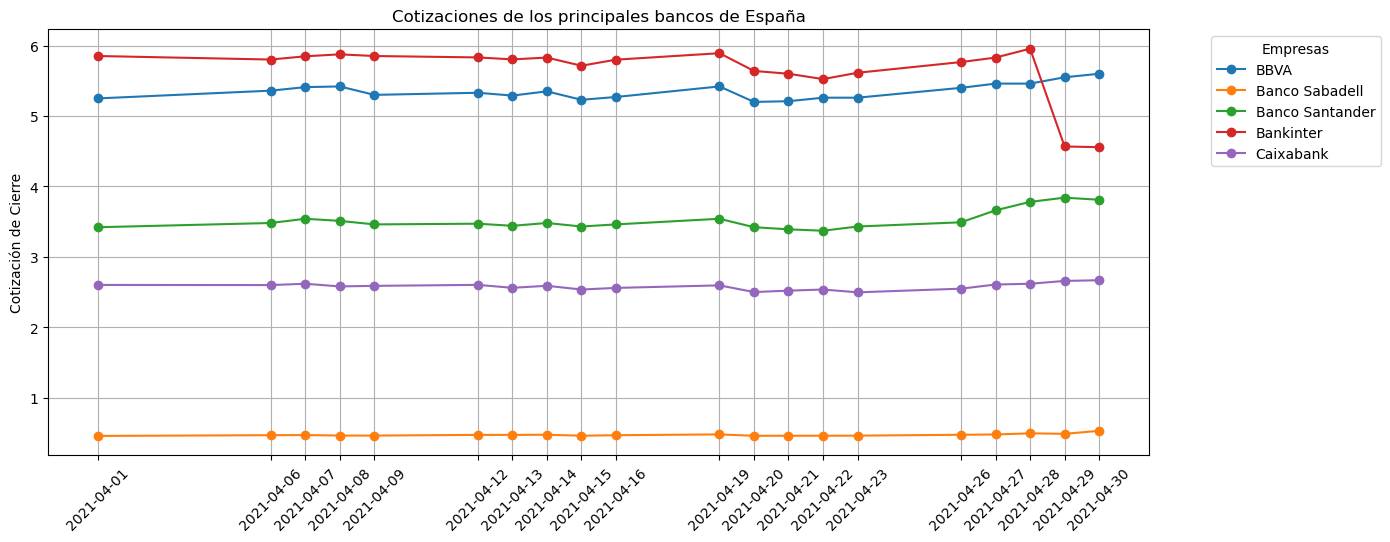

In [36]:
bancos = pd.read_csv("bancos.csv")

plt.figure(figsize=(14, 5))

bancos['Fecha'] = pd.to_datetime(bancos['Fecha'])
datos_filtrados = bancos[['Fecha', 'Empresa', 'Cierre']]

datos_bancos = datos_filtrados.pivot(index='Fecha', columns='Empresa', values='Cierre').dropna() #con el dropna eliminariamos el dia 05, que tiene valores nulos, probar sin el dropna()
#print(datos_bancos)

for banco in datos_bancos.columns:
    plt.plot(datos_bancos.index, datos_bancos[banco], marker='o', label=banco)

plt.title("Cotizaciones de los principales bancos de España")
plt.ylabel("Cotización de Cierre")
#leyenda fuera
plt.legend(title="Empresas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(datos_bancos.index, rotation=45)
plt.grid(True)

plt.show()


### 5. El fichero `titanic.csv` contiene información sobre los pasajeros del Titanic. Crear un dataframe con Pandas y a partir de él generar los siguientes diagramas:

In [37]:
import seaborn as sns

# Cargar el conjunto de datos 'tips' de Seaborn
df = sns.load_dataset('tips')

titanic = pd.read_csv("titanic.csv")

- Diagrama de sectores con los fallecidos y supervivientes.

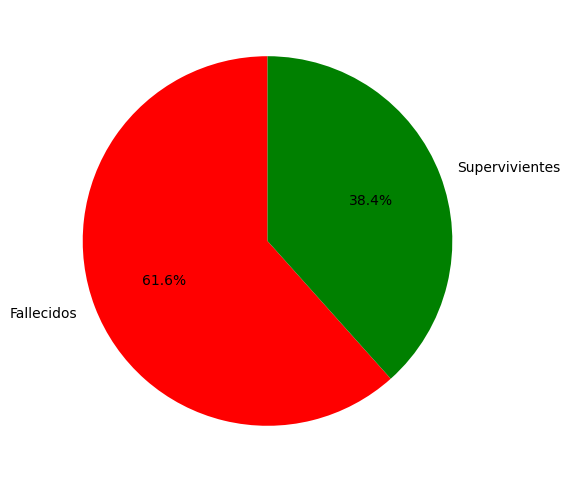

In [38]:
cuenta_supervivientes = titanic['Survived'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(cuenta_supervivientes, labels=['Fallecidos', 'Supervivientes'],
        autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.show()

- Histograma con las edades.

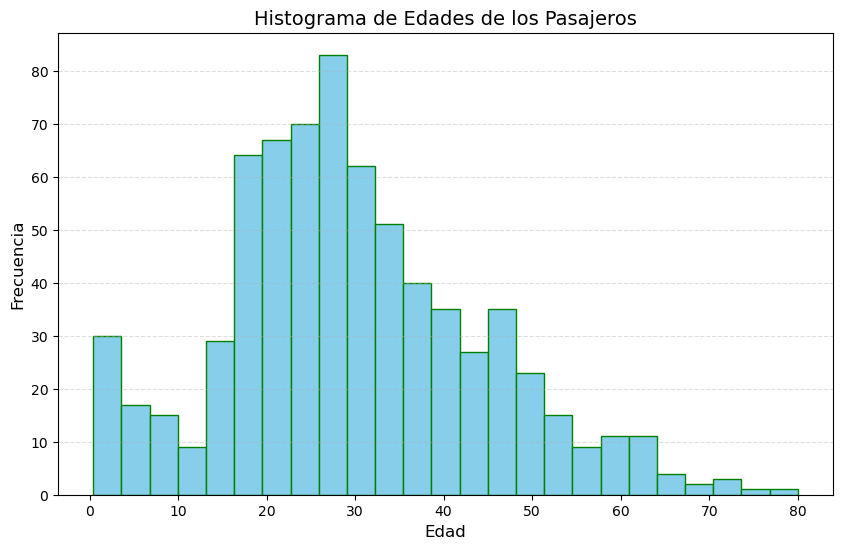

In [27]:
titanic = pd.read_csv("titanic.csv")
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=25, color='skyblue', edgecolor='green')    
plt.title('Histograma de Edades de los Pasajeros', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

- Diagrama de barras con el número de personas en cada clase.

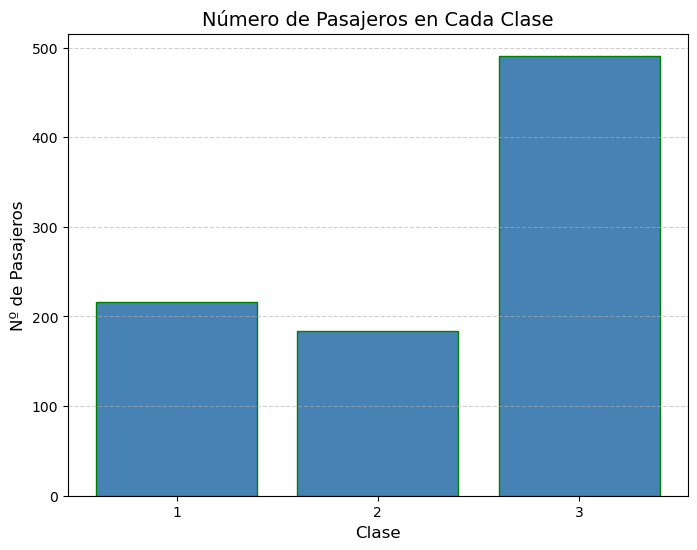

In [35]:
titanic = pd.read_csv("titanic.csv")
clases_datos = titanic['Pclass'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(clases_datos.index, clases_datos.values, color='steelblue', edgecolor='green')
plt.title('Número de Pasajeros en Cada Clase', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Nº de Pasajeros', fontsize=12)
plt.xticks(clases_datos.index) #pone los indices en el x de los datos que stamos analizando
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


- Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.

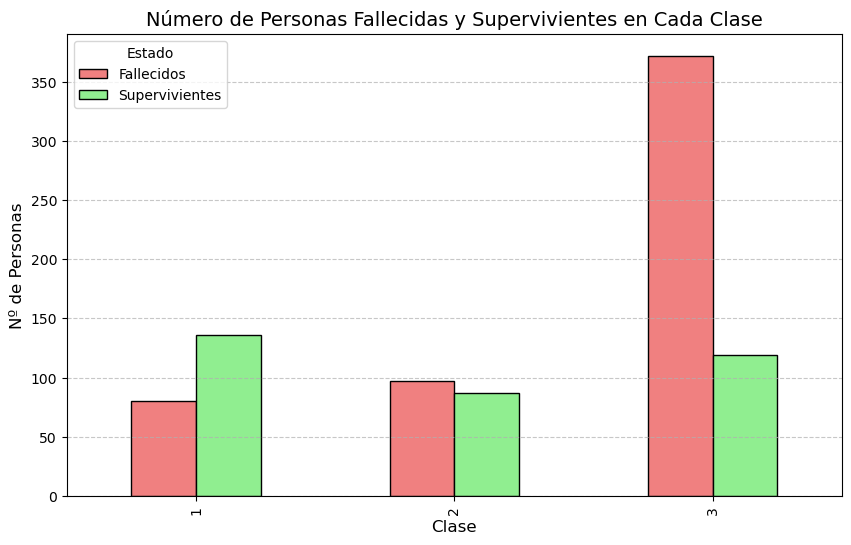

In [ ]:
#agrupacion de pasajeros por supervivencia y clase
grupo_clase_supervi = titanic.groupby(['Pclass', 'Survived']).size().unstack()
#representamos el grupo
grupo_clase_supervi.plot(kind='bar', figsize=(10, 6), stacked=False, color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Número de Personas Fallecidas y Supervivientes en Cada Clase', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Nº de Personas', fontsize=12)
plt.legend(['Fallecidos', 'Supervivientes'], title='Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Diagrama de barras con el número de personas fallecidas y supervivientes acumuladas en cada clase.


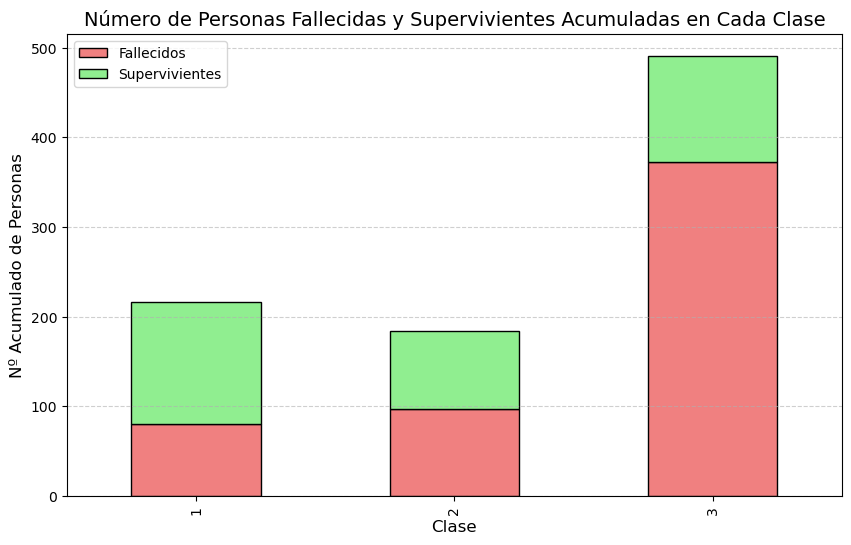

In [42]:
#grupo
grupo_clase_supervi = titanic.groupby(['Pclass', 'Survived']).size().unstack()
#representacion
grupo_clase_supervi.plot(kind='bar', figsize=(10, 6), stacked=True, color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Número de Personas Fallecidas y Supervivientes Acumuladas en Cada Clase', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Nº Acumulado de Personas', fontsize=12)
plt.legend(['Fallecidos', 'Supervivientes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### 6. Usando el dataset tips de Seaborn, crea una figura con 2 filas y tres columnas en el que sitúes las siguientes gráficas:


- Un gráfico de barras que muestre el total de la cuenta (total_bill) por día (day).
- Un gráfico de líneas que muestre la relación entre el total de la cuenta (total_bill) y la propina (tip). Muestra también con una línea la propina media.
- Un gráfico de dispersión entre el total de la cuenta (total_bill) y la propina (tip).
- Un gráfico circular que muestre la distribución del total de la cuenta por sexo.
- Un histograma para la distribución del total de la cuenta (total_bill). 
- Un gráfico de caja y bigotes con los valores de las propinas (tip) en función del día de la semana (day).

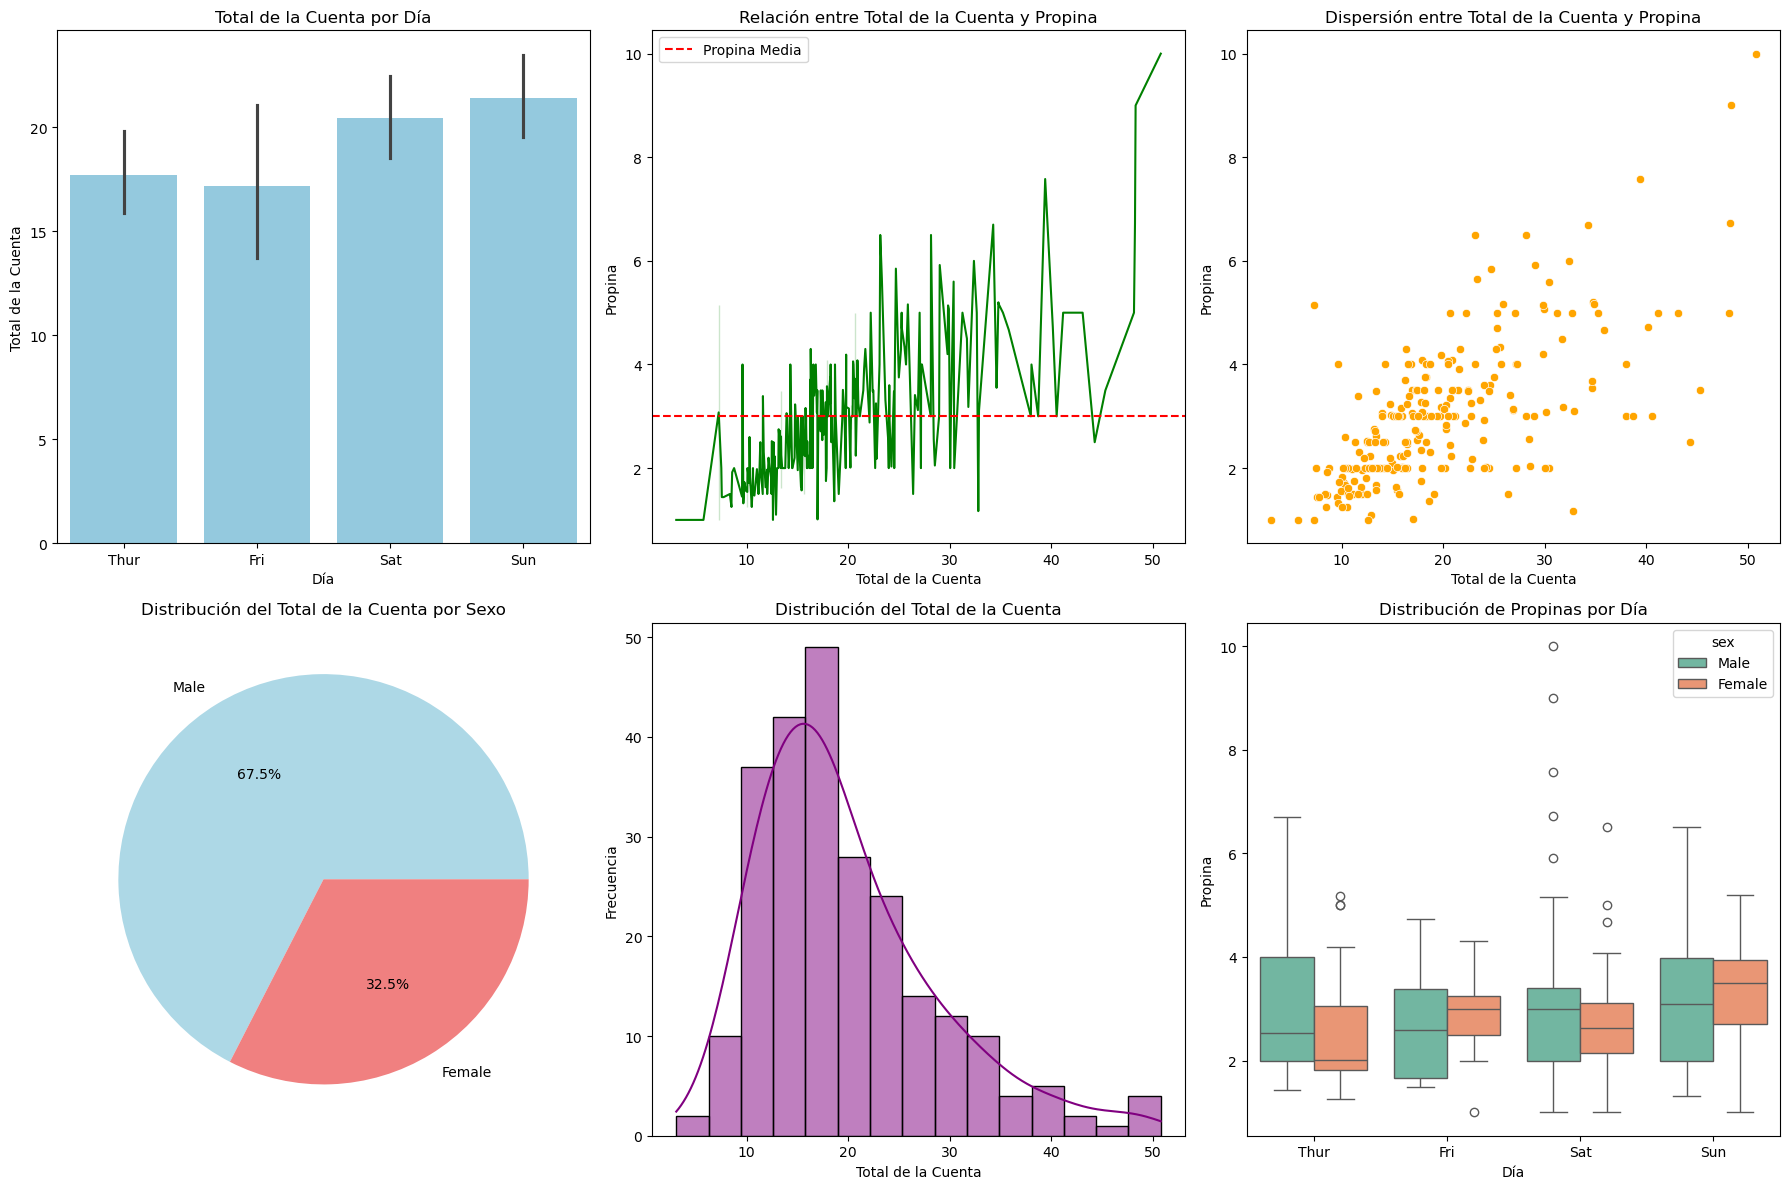

In [47]:
tips = sns.load_dataset('tips')

#figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico de barras para ver el total de la cuenta (total_bill) por día (day)sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0, 0], color='skyblue')
sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Total de la Cuenta por Día')
axes[0, 0].set_xlabel('Día')
axes[0, 0].set_ylabel('Total de la Cuenta')

# Gráfico de líneas para ver la relación entre el total de la cuenta (total_bill) y la propina (tip)sns.lineplot(x='total_bill', y='tip', data=tips, ax=axes[0, 1], color='green')
sns.lineplot(x='total_bill', y='tip', data=tips, ax=axes[0, 1], color='green')
axes[0, 1].axhline(tips['tip'].mean(), color='red', linestyle='--', label='Propina Media')
axes[0, 1].set_title('Relación entre Total de la Cuenta y Propina')
axes[0, 1].set_xlabel('Total de la Cuenta')
axes[0, 1].set_ylabel('Propina')
axes[0, 1].legend()

# Gráfico de dispersión para ver la relación entre total_bill y tip
sns.scatterplot(x='total_bill', y='tip', data=tips, ax=axes[0, 2], color='orange')
axes[0, 2].set_title('Dispersión entre Total de la Cuenta y Propina')
axes[0, 2].set_xlabel('Total de la Cuenta')
axes[0, 2].set_ylabel('Propina')

# Gráfico circular para ver cómo se distribuye el total de la cuenta entre los géneros
gender_distribution = tips.groupby('sex', observed=False)['total_bill'].sum()
axes[1, 0].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[1, 0].set_title('Distribución del Total de la Cuenta por Sexo')

# Histograma para ver la distribución del total de la cuenta
sns.histplot(tips['total_bill'], bins=15, kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Distribución del Total de la Cuenta')
axes[1, 1].set_xlabel('Total de la Cuenta')
axes[1, 1].set_ylabel('Frecuencia')

# Gráfico de caja y bigotes para ver la distribución de las propinas por día de la semana
sns.boxplot(x='day', y='tip', data=tips, ax=axes[1, 2], hue='sex', palette='Set2')
axes[1, 2].set_title('Distribución de Propinas por Día')
axes[1, 2].set_xlabel('Día')
axes[1, 2].set_ylabel('Propina')

#espacio entre los subgráficos
plt.tight_layout()

plt.show()

#### 7. Usando el dataset tips de Seaborn, crea un gráfico de barras apiladas para mostrar cómo se distribuyen las propinas por día y por sexo.
- Personaliza el gráfico añadiendo un título, etiquetas a los ejes y ajustando los colores de las barras.


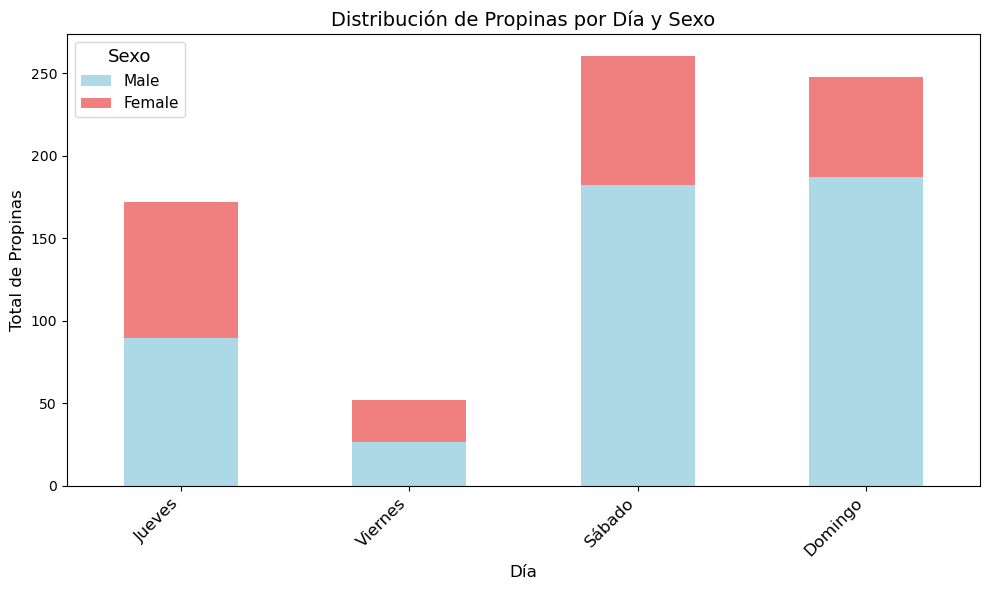

In [51]:
# Cargar los datos del dataset 'tips'
tips = sns.load_dataset('tips')

# Crear una tabla dinámica que muestre la suma de las propinas por día y por sexo
pivot_data = tips.pivot_table(values='tip', index='day', columns='sex', aggfunc='sum', observed=False)

# Crear el gráfico de barras apiladas
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])

# Personalizar el gráfico
ax.set_title('Distribución de Propinas por Día y Sexo', fontsize=14)
ax.set_xlabel('Día', fontsize=12)
ax.set_ylabel('Total de Propinas', fontsize=12)
# Cambiamos los dias al epsañol
ax.set_xticklabels(['Jueves', 'Viernes', 'Sábado', 'Domingo'], fontsize=12)
# Las giramos para que sean mas legibles
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.legend(title='Sexo', title_fontsize='13', fontsize='11')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### 8. Usando el dataset tips de Seaborn, crea un gráfico de líneas en el que se representen dos series:
- La relación entre total_bill y tip.
- La relación entre total_bill y el tamaño de la mesa (size).
- Añade una leyenda que identifique las dos series y personaliza el gráfico añadiendo un título y etiquetas a los ejes.

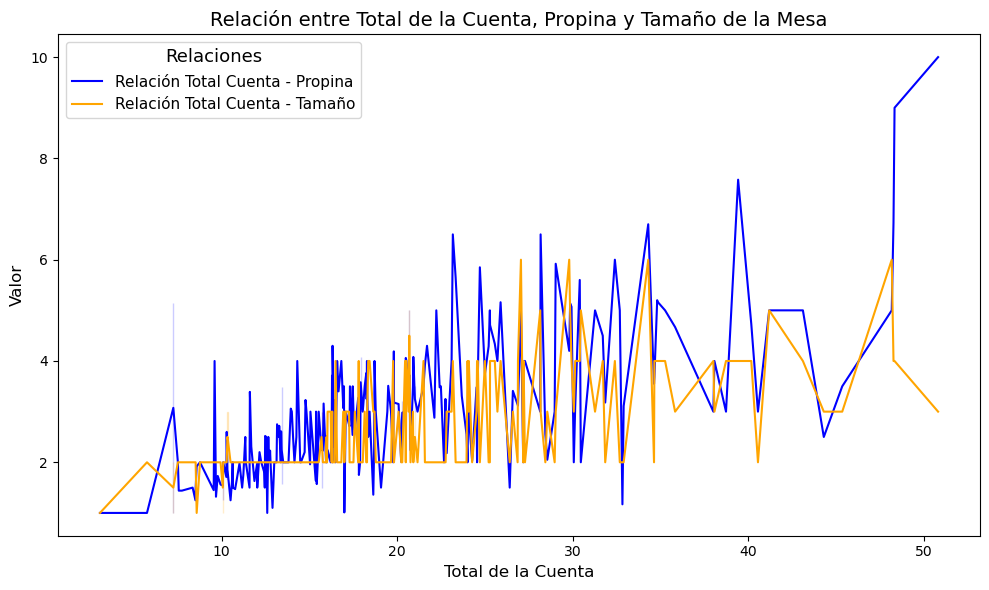

In [53]:
plt.figure(figsize=(10, 6))

# Relación entre total_bill y tip
sns.lineplot(x='total_bill', y='tip', data=tips, label='Relación Total Cuenta - Propina', color='blue')

# Relación entre total_bill y size
sns.lineplot(x='total_bill', y='size', data=tips, label='Relación Total Cuenta - Tamaño', color='orange')

# Personalizar el gráfico
plt.title('Relación entre Total de la Cuenta, Propina y Tamaño de la Mesa', fontsize=14)
plt.xlabel('Total de la Cuenta', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir la leyenda
plt.legend(title='Relaciones', title_fontsize='13', fontsize='11')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### 9. Usando el dataset tips de Seaborn, crea un gráfico de dispersión entre total_bill y tip. 

- Asigna colores diferentes a los puntos del gráfico según el género (sex) del cliente, utilizando color='blue' para los hombres y color='red' para las mujeres. 

- Personaliza el gráfico añadiendo un título, etiquetas a los ejes y una leyenda.


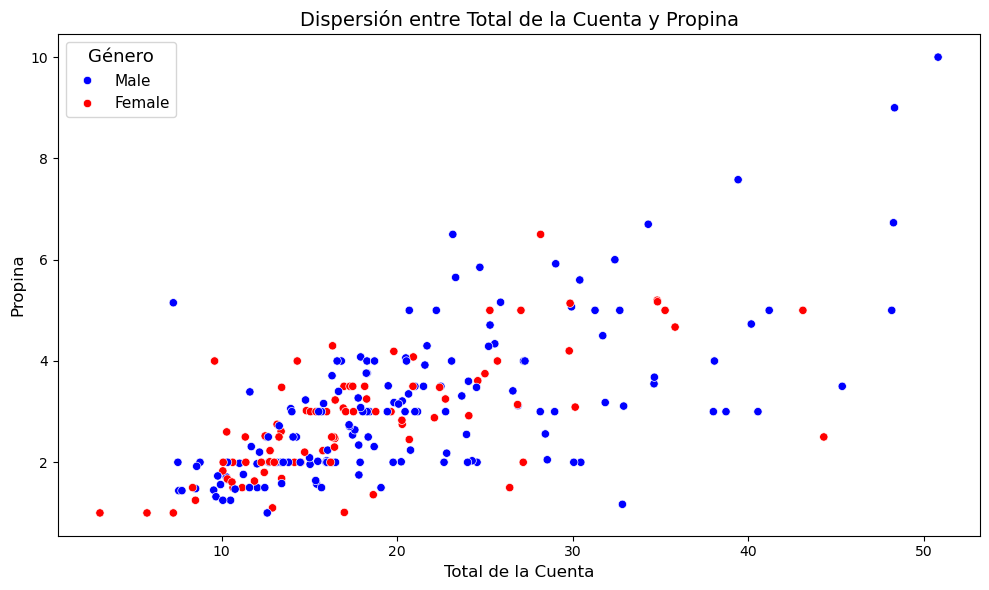

In [54]:
plt.figure(figsize=(10, 6))

# Asignar colores según el género
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex', palette={'Male': 'blue', 'Female': 'red'})

# Personalizar el gráfico
plt.title('Dispersión entre Total de la Cuenta y Propina', fontsize=14)
plt.xlabel('Total de la Cuenta', fontsize=12)
plt.ylabel('Propina', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Género', title_fontsize='13', fontsize='11')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### 10. Usando el dataset tips de Seaborn, crea una figura con subgráficos que contengan diferentes tipos de gráficos.
- En el primer subgráfico, crea un gráfico de barras que muestre la relación entre day y total_bill.
- En el segundo subgráfico, crea un gráfico circular que muestre la distribución de total_bill entre los géneros (sex).
- Personaliza ambos gráficos con títulos, etiquetas en los ejes y ajuste del espacio entre los gráficos.


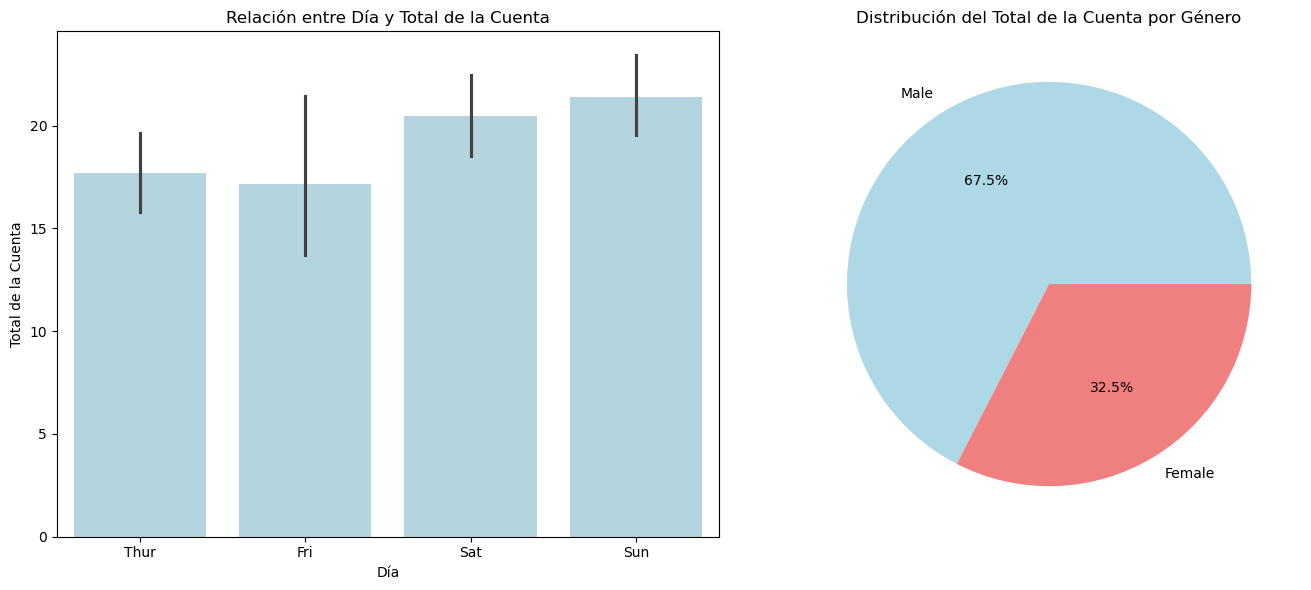

In [56]:
# Crear la figura con subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Primer subgráfico: gráfico de barras entre day y total_bill
sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0], color='lightblue')
axes[0].set_title('Relación entre Día y Total de la Cuenta')
axes[0].set_xlabel('Día')
axes[0].set_ylabel('Total de la Cuenta')

# Segundo subgráfico: gráfico circular de distribución de total_bill entre los géneros
gender_distribution = tips.groupby('sex',observed=False)['total_bill'].sum()
axes[1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[1].set_title('Distribución del Total de la Cuenta por Género')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

#### 11. Usando el dataset tips de Seaborn, crea un gráfico de de dispersión que muestre la relación entre total_bill y tip.
- Ajusta una línea de tendencia (regresión lineal) a los datos utilizando scipy.stats.linregress().
- Muestra la línea de tendencia en el gráfico junto con los puntos de dispersión.
- Personaliza el gráfico con un título, etiquetas a los ejes y una leyenda que indique la línea de tendencia.


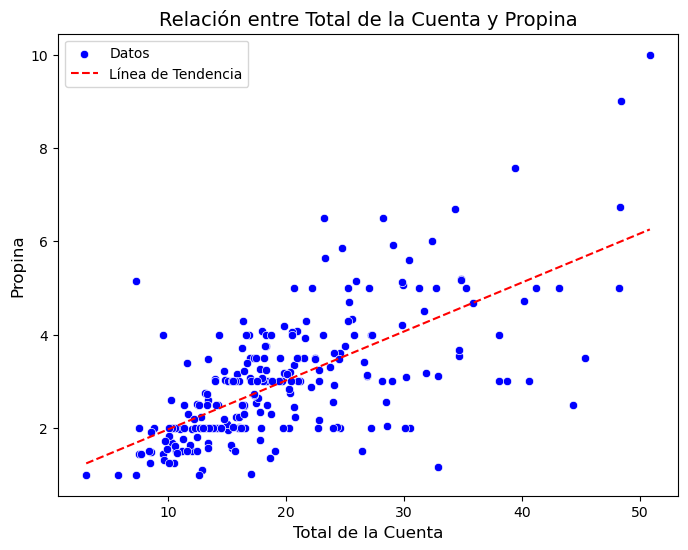

In [ ]:
from scipy.stats import linregress
# Crear el gráfico de dispersión entre total_bill y tip
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue', label='Datos')

# Ajustar una línea de regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(tips['total_bill'], tips['tip'])

# Generar los valores de la línea de tendencia
line_x = np.linspace(tips['total_bill'].min(), tips['total_bill'].max(), 100)
line_y = slope * line_x + intercept

# Graficar la línea de tendencia
plt.plot(line_x, line_y, color='red', linestyle='--', label='Línea de Tendencia')

# Personalizacion del gráfico
plt.title('Relación entre Total de la Cuenta y Propina', fontsize=14)
plt.xlabel('Total de la Cuenta', fontsize=12)
plt.ylabel('Propina', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()